<a href="https://colab.research.google.com/github/devinandana01/DeviProject/blob/main/Devi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download packages

In [1]:
!pip install xgboost

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from numpy import argmax
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import random
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

## Importing Dataset

In [3]:
df=pd.read_csv("transactions_df.csv")

## printing columns

In [4]:
df.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'ACCOUNT_ID', 'TRANSACTION_TYPE',
       'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD',
       'TX_FRAUD_SCENARIO', 'TX_AMOUNT_STD', 'TX_AMOUNT_MEAN',
       'Amount_Deviation', 'Amount_Threshold', 'Time_Seconds_Diff',
       'Time_Diff', 'TX_DURING_WEEKEND', 'TX_DURING_NIGHT',
       'TX_FRAUD_1H_SCENARIO', 'ACCOUNT_ID_NB_TX_1H_WINDOW',
       'ACCOUNT_ID_AVG_AMOUNT_1H_WINDOW'],
      dtype='object')

## Visualizing label count

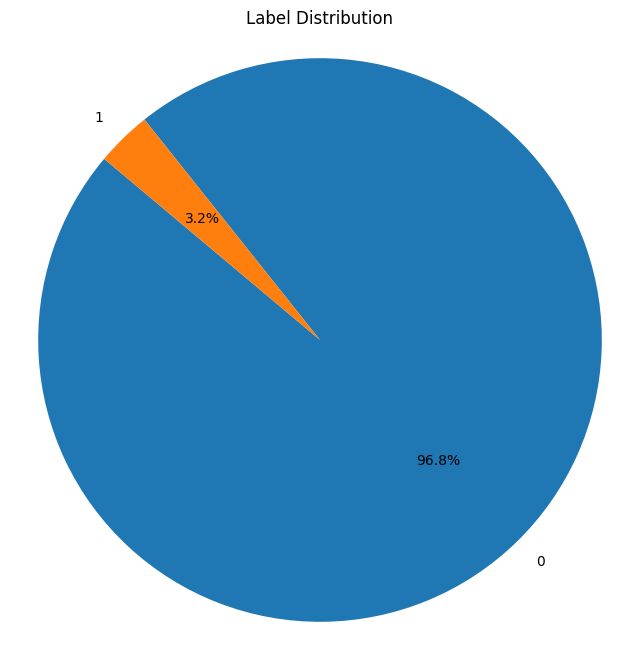

In [5]:
# Count the occurrences of each label
label_counts = df['TX_FRAUD'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Label Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## Take specific count of labels

In [6]:
df_fraud = df[df['TX_FRAUD'] == 1].sample(55893, random_state=1)
df_normal = df[df['TX_FRAUD'] == 0].sample(100000, random_state=1)
df_New = pd.concat([df_fraud , df_normal], ignore_index=True)

## Percentage of labels in new dataframe

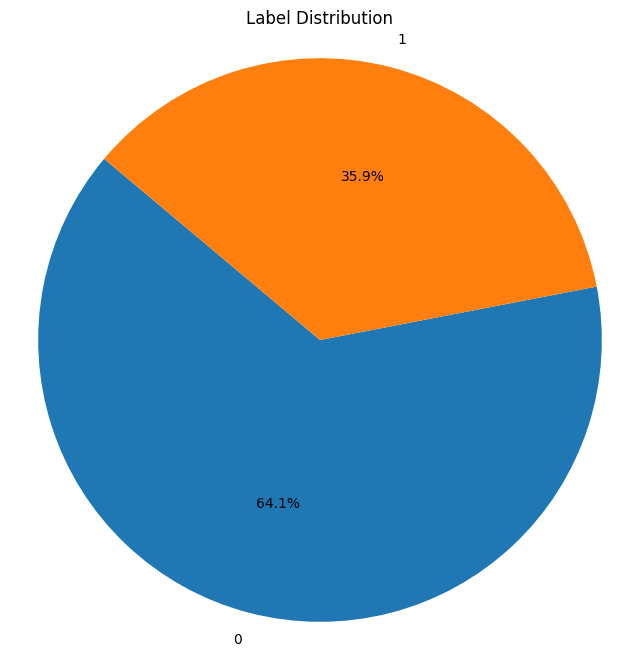

In [7]:
# Count the occurrences of each label
label_counts = df_New['TX_FRAUD'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Label Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [8]:
df_New

,TRANSACTION_ID,TX_DATETIME,ACCOUNT_ID,TRANSACTION_TYPE,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_AMOUNT_STD,TX_AMOUNT_MEAN,Amount_Deviation,Amount_Threshold,Time_Seconds_Diff,Time_Diff,TX_DURING_WEEKEND,TX_DURING_NIGHT,TX_FRAUD_1H_SCENARIO,ACCOUNT_ID_NB_TX_1H_WINDOW,ACCOUNT_ID_AVG_AMOUNT_1H_WINDOW
0,1377682,2023-08-22 07:46:45,535,3,11594.79,12383205,143,1,3,2352.315471,5099.497926,6495.292074,4704.630943,84978.0,84978.0,0,0,0,1.0,11594.790000
1,1050699,2023-07-19 07:42:03,4251,1,150307.49,9445323,109,1,3,34854.649179,77981.680865,72325.809135,69709.298357,145791.0,145791.0,0,0,0,1.0,150307.490000
2,213319,2023-04-23 07:27:03,3153,3,115722.94,1927623,22,1,3,27291.624997,59870.128942,55852.811058,54583.249993,20903.0,20903.0,1,0,0,1.0,115722.940000
3,1003270,2023-07-14 09:01:13,4613,1,129919.24,9018073,104,1,3,27477.163222,57637.439770,72281.800230,54954.326444,15818.0,15818.0,0,0,0,1.0,129919.240000
4,1092440,2023-07-23 12:37:39,562,1,85801.59,9808659,113,1,6,29928.901439,65889.203757,19912.386243,59857.802877,377.0,377.0,1,0,1,3.0,49835.403333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155888,1593554,2023-09-13 14:13:35,2788,1,21441.70,14307215,165,0,0,13690.498251,29454.808150,-8013.108150,27380.996502,384.0,384.0,0,0,0,2.0,27741.175000
155889,349945,2023-05-07 09:58:56,661,1,6252.93,3146336,36,0,0,3018.322899,6794.526667,-541.596667,6036.645799,13253.0,13253.0,1,0,0,1.0,6252.930000
155890,1210002,2023-08-04 15:31:16,231,2,24148.34,10855876,125,0,0,20096.927689,40352.958047,-16204.618047,40193.855378,116330.0,116330.0,0,0,0,1.0,24148.340000
155891,1550755,2023-09-09 07:44:01,2709,1,35084.05,13938241,161,0,0,11485.787323,25428.344239,9655.705761,22971.574645,67551.0,67551.0,1,0,0,1.0,35084.050000


In [9]:
df_New['TX_FRAUD'].value_counts()

,count
TX_FRAUD,
0,100000
1,55893


In [10]:
df1=df_New

## EDA

In [11]:
# 1. Display the first few rows
print("First few rows of the dataset:")
df1.head()

First few rows of the dataset:


,TRANSACTION_ID,TX_DATETIME,ACCOUNT_ID,TRANSACTION_TYPE,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_AMOUNT_STD,TX_AMOUNT_MEAN,Amount_Deviation,Amount_Threshold,Time_Seconds_Diff,Time_Diff,TX_DURING_WEEKEND,TX_DURING_NIGHT,TX_FRAUD_1H_SCENARIO,ACCOUNT_ID_NB_TX_1H_WINDOW,ACCOUNT_ID_AVG_AMOUNT_1H_WINDOW
0,1377682,2023-08-22 07:46:45,535,3,11594.79,12383205,143,1,3,2352.315471,5099.497926,6495.292074,4704.630943,84978.0,84978.0,0,0,0,1.0,11594.790000
1,1050699,2023-07-19 07:42:03,4251,1,150307.49,9445323,109,1,3,34854.649179,77981.680865,72325.809135,69709.298357,145791.0,145791.0,0,0,0,1.0,150307.490000
2,213319,2023-04-23 07:27:03,3153,3,115722.94,1927623,22,1,3,27291.624997,59870.128942,55852.811058,54583.249993,20903.0,20903.0,1,0,0,1.0,115722.940000
3,1003270,2023-07-14 09:01:13,4613,1,129919.24,9018073,104,1,3,27477.163222,57637.439770,72281.800230,54954.326444,15818.0,15818.0,0,0,0,1.0,129919.240000
4,1092440,2023-07-23 12:37:39,562,1,85801.59,9808659,113,1,6,29928.901439,65889.203757,19912.386243,59857.802877,377.0,377.0,1,0,1,3.0,49835.403333


In [12]:
# 2. Check for missing values
print("\nMissing values per column:")
print(df1.isnull().sum())


Missing values per column:
TRANSACTION_ID                     0
TX_DATETIME                        0
ACCOUNT_ID                         0
TRANSACTION_TYPE                   0
TX_AMOUNT                          0
TX_TIME_SECONDS                    0
TX_TIME_DAYS                       0
TX_FRAUD                           0
TX_FRAUD_SCENARIO                  0
TX_AMOUNT_STD                      0
TX_AMOUNT_MEAN                     0
Amount_Deviation                   0
Amount_Threshold                   0
Time_Seconds_Diff                  0
Time_Diff                          0
TX_DURING_WEEKEND                  0
TX_DURING_NIGHT                    0
TX_FRAUD_1H_SCENARIO               0
ACCOUNT_ID_NB_TX_1H_WINDOW         0
ACCOUNT_ID_AVG_AMOUNT_1H_WINDOW    0
dtype: int64


In [13]:
# 3. Basic statistical summary of numerical columns
print("\nStatistical summary of numerical columns:")
print(df1.describe())


Statistical summary of numerical columns:
       TRANSACTION_ID     ACCOUNT_ID  TRANSACTION_TYPE      TX_AMOUNT  \
count    1.558930e+05  155893.000000     155893.000000  155893.000000   
mean     8.850051e+05    2496.485936          2.013144   69302.534454   
std      5.063247e+05    1449.013852          0.829962   53156.206431   
min      2.530000e+02       0.000000          1.000000       8.790000   
25%      4.479580e+05    1230.000000          1.000000   26582.860000   
50%      8.864690e+05    2492.000000          2.000000   55856.940000   
75%      1.323892e+06    3754.000000          3.000000   99949.160000   
max      1.760268e+06    4999.000000          4.000000  307732.250000   

       TX_TIME_SECONDS   TX_TIME_DAYS       TX_FRAUD  TX_FRAUD_SCENARIO  \
count     1.558930e+05  155893.000000  155893.000000      155893.000000   
mean      7.948001e+06      91.490381       0.358534           1.239806   
std       4.547422e+06      52.631680       0.479572           1.773058   

In [14]:
# 4. Distribution of transaction types
print("\nTransaction type counts:")
print(df1['TRANSACTION_TYPE'].value_counts())


Transaction type counts:
TRANSACTION_TYPE
3    51736
1    51683
2    51476
4      998
Name: count, dtype: int64


In [15]:
# 5. Distribution of fraud vs. non-fraud transactions
print("\nFraud vs. Non-fraud transactions:")
print(df1['TX_FRAUD'].value_counts())


Fraud vs. Non-fraud transactions:
TX_FRAUD
0    100000
1     55893
Name: count, dtype: int64


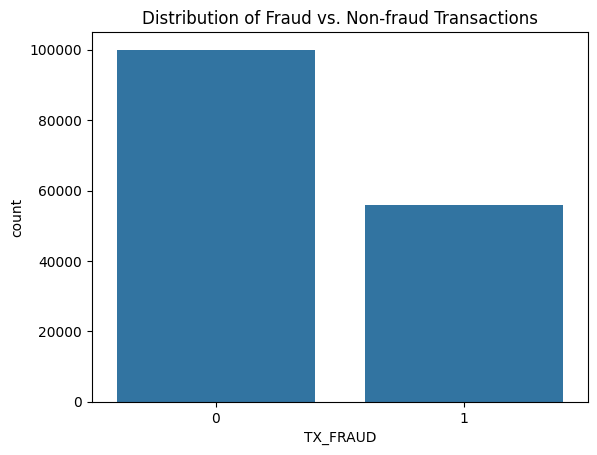

In [16]:
# 6. Visualizing fraud and non-fraud transactions
sns.countplot(data=df1, x='TX_FRAUD')
plt.title("Distribution of Fraud vs. Non-fraud Transactions")
plt.show()


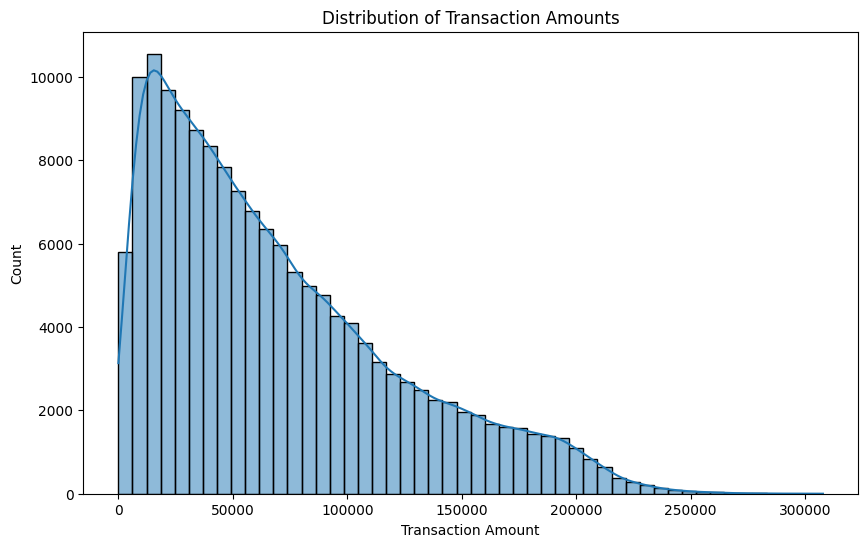

In [17]:
# 7. Transaction amount distribution (Overall)
plt.figure(figsize=(10, 6))
sns.histplot(df1['TX_AMOUNT'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.show()


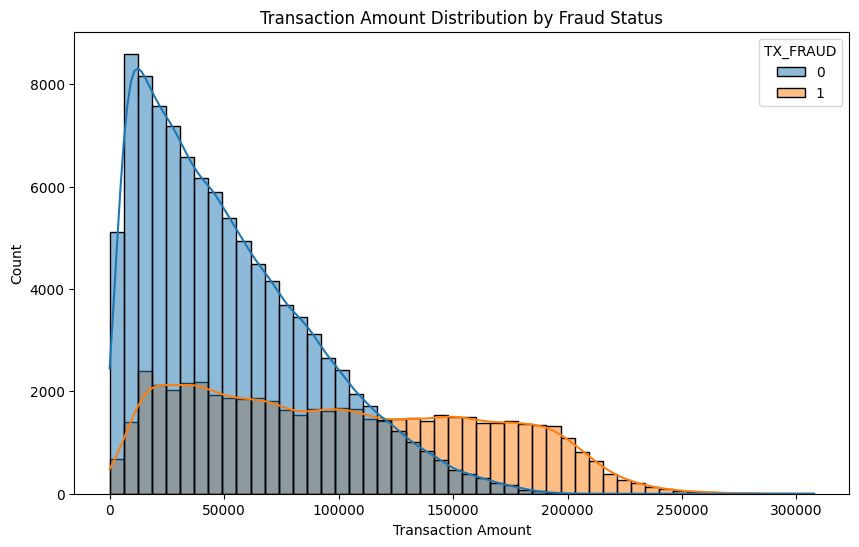

In [18]:
# 8. Transaction amount distribution by fraud status
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='TX_AMOUNT', hue='TX_FRAUD', bins=50, kde=True)
plt.title("Transaction Amount Distribution by Fraud Status")
plt.xlabel("Transaction Amount")
plt.show()

In [19]:
# 9. Mean transaction amount per fraud status
mean_amount_by_fraud = df1.groupby('TX_FRAUD')['TX_AMOUNT'].mean()
print("\nMean transaction amount by fraud status:")
print(mean_amount_by_fraud)


Mean transaction amount by fraud status:
TX_FRAUD
0     51684.933569
1    100822.762183
Name: TX_AMOUNT, dtype: float64


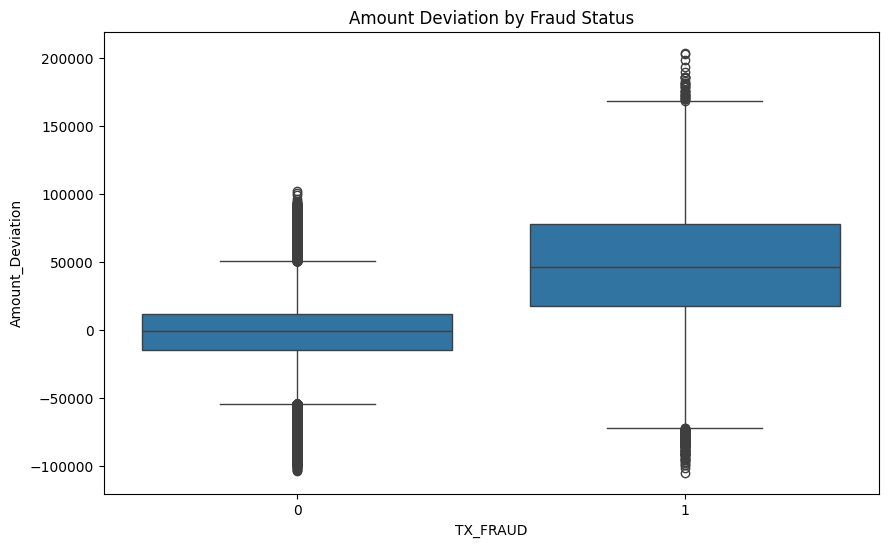

In [20]:
# 10. Analysis of Amount Deviation by Fraud Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='TX_FRAUD', y='Amount_Deviation')
plt.title("Amount Deviation by Fraud Status")
plt.show()

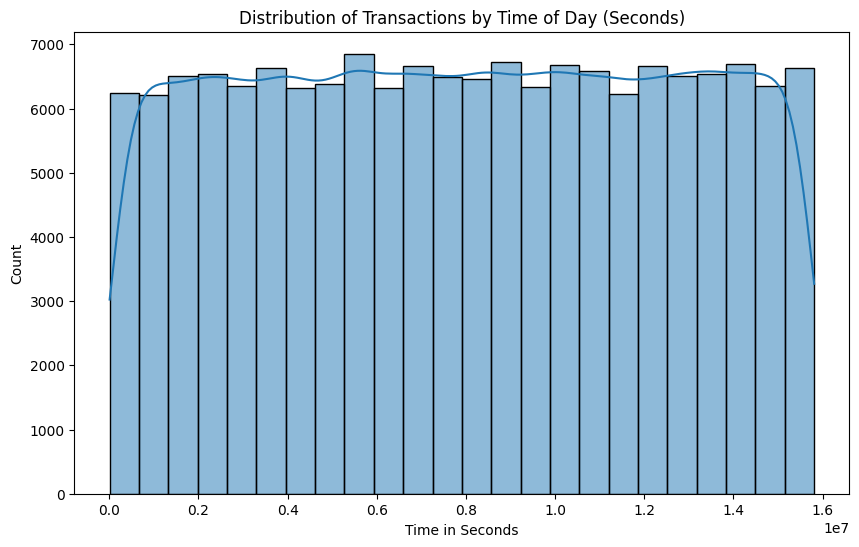

In [21]:
# 11. Transaction count by time of day
plt.figure(figsize=(10, 6))
sns.histplot(df1['TX_TIME_SECONDS'], bins=24, kde=True)
plt.title("Distribution of Transactions by Time of Day (Seconds)")
plt.xlabel("Time in Seconds")
plt.show()

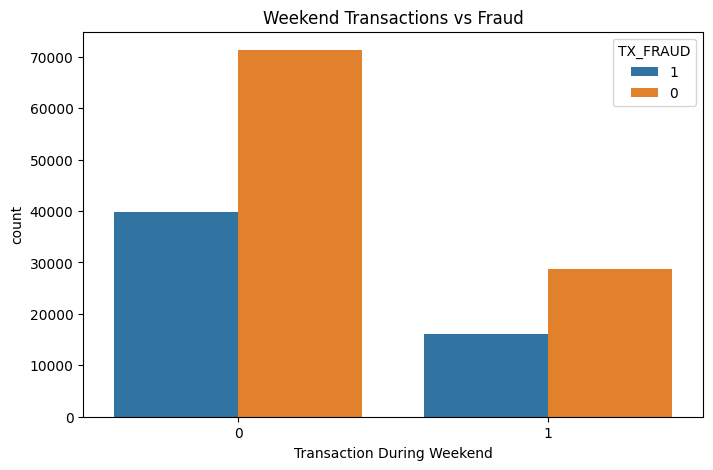

In [22]:
# 12. Transactions on weekends vs. fraud rate
df1['TX_DURING_NIGHT'] = df1['TX_DURING_NIGHT'].astype(str)
df1['TX_FRAUD'] = df1['TX_FRAUD'].astype(str)
plt.figure(figsize=(8, 5))
sns.countplot(data=df1, x='TX_DURING_WEEKEND', hue='TX_FRAUD')
plt.title("Weekend Transactions vs Fraud")
plt.xlabel("Transaction During Weekend")
plt.show()

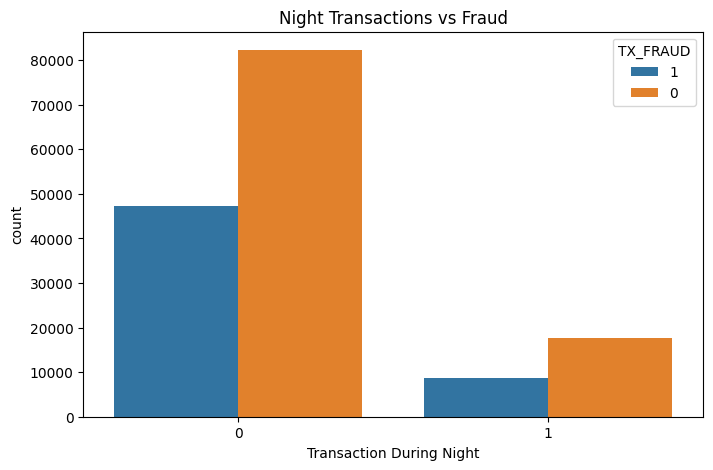

In [23]:
# 13. Transactions at night vs fraud rate
# Convert 'TX_DURING_NIGHT' and 'TX_FRAUD' to strings to ensure proper interpretation
df1['TX_DURING_NIGHT'] = df1['TX_DURING_NIGHT'].astype(str)
df1['TX_FRAUD'] = df1['TX_FRAUD'].astype(str)
plt.figure(figsize=(8, 5))
sns.countplot(data=df1, x='TX_DURING_NIGHT', hue='TX_FRAUD')
plt.title("Night Transactions vs Fraud")
plt.xlabel("Transaction During Night")
plt.show()

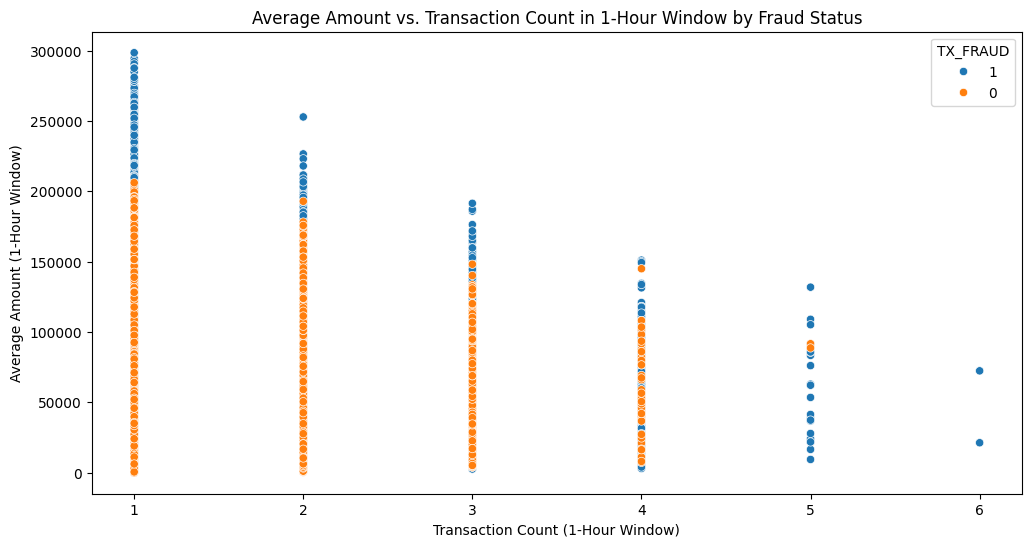

In [24]:
# 14. Average amount and transaction count within 1-hour window
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df1, x='ACCOUNT_ID_NB_TX_1H_WINDOW', y='ACCOUNT_ID_AVG_AMOUNT_1H_WINDOW', hue='TX_FRAUD')
plt.title("Average Amount vs. Transaction Count in 1-Hour Window by Fraud Status")
plt.xlabel("Transaction Count (1-Hour Window)")
plt.ylabel("Average Amount (1-Hour Window)")
plt.show()

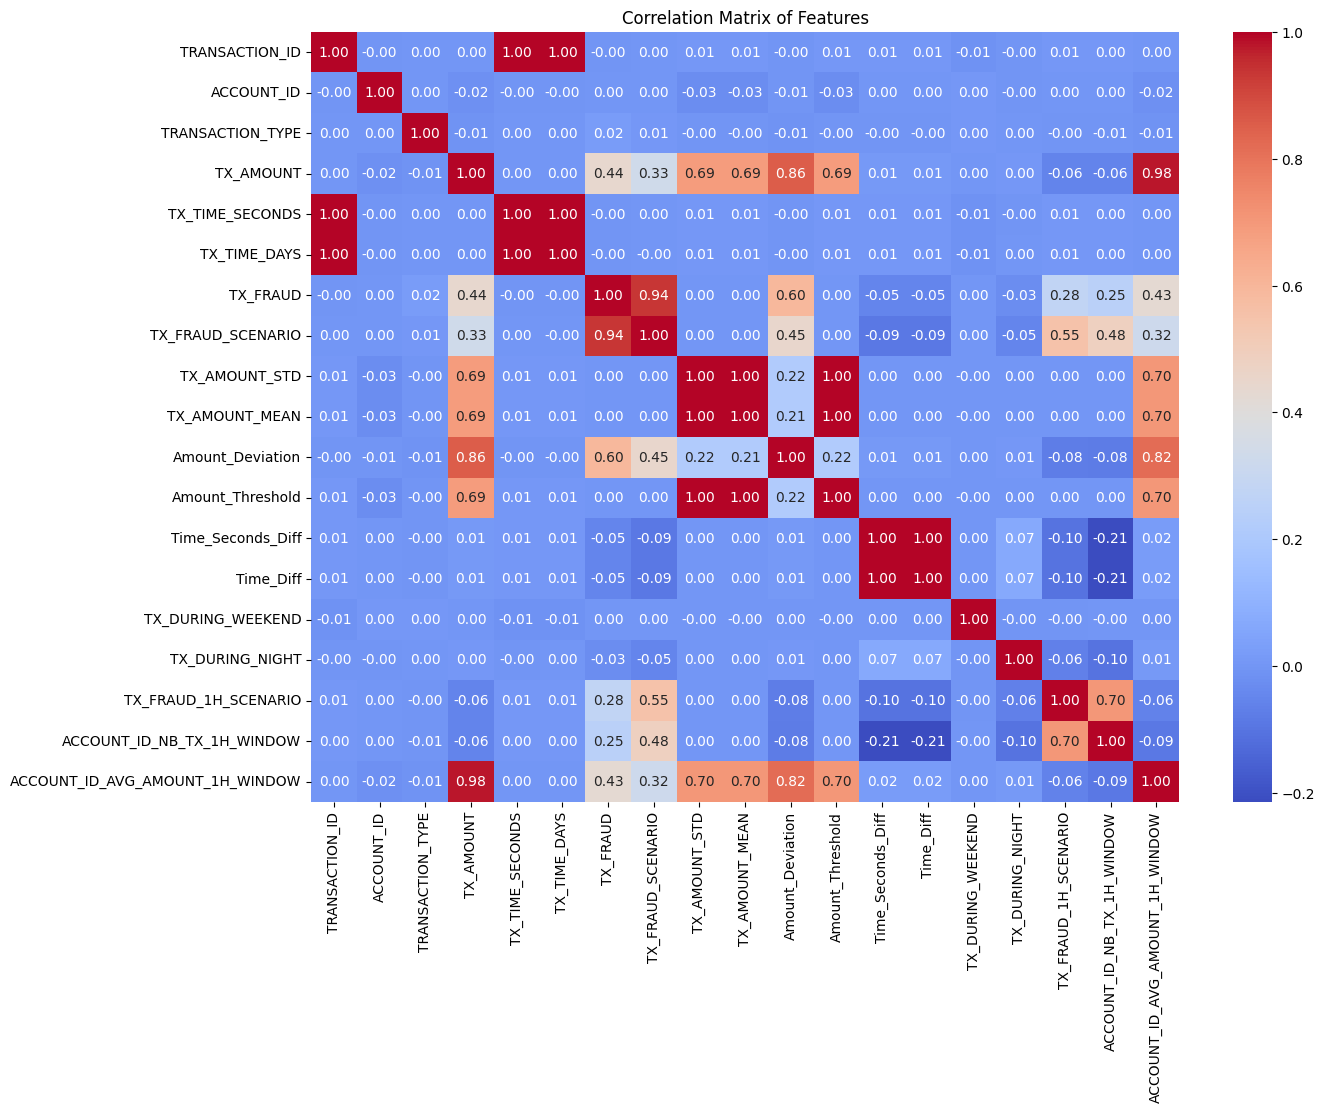

In [25]:
# 15. Correlation matrix heatmap
x1=df1.drop(columns=['TX_DATETIME'])
plt.figure(figsize=(14, 10))
sns.heatmap(x1.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Features")
plt.show()

## Assigning values for Data and Target

In [26]:
x=df1.drop(columns=['TRANSACTION_ID','TX_DATETIME', 'ACCOUNT_ID','TX_FRAUD','TX_FRAUD_SCENARIO'])
y=df1['TX_FRAUD']

In [36]:
x

,TRANSACTION_TYPE,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_AMOUNT_STD,TX_AMOUNT_MEAN,Amount_Deviation,Amount_Threshold,Time_Seconds_Diff,Time_Diff,TX_DURING_WEEKEND,TX_DURING_NIGHT,TX_FRAUD_1H_SCENARIO,ACCOUNT_ID_NB_TX_1H_WINDOW,ACCOUNT_ID_AVG_AMOUNT_1H_WINDOW
0,3,11594.79,12383205,143,2352.315471,5099.497926,6495.292074,4704.630943,84978.0,84978.0,0,0,0,1.0,11594.790000
1,1,150307.49,9445323,109,34854.649179,77981.680865,72325.809135,69709.298357,145791.0,145791.0,0,0,0,1.0,150307.490000
2,3,115722.94,1927623,22,27291.624997,59870.128942,55852.811058,54583.249993,20903.0,20903.0,1,0,0,1.0,115722.940000
3,1,129919.24,9018073,104,27477.163222,57637.439770,72281.800230,54954.326444,15818.0,15818.0,0,0,0,1.0,129919.240000
4,1,85801.59,9808659,113,29928.901439,65889.203757,19912.386243,59857.802877,377.0,377.0,1,0,1,3.0,49835.403333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155888,1,21441.70,14307215,165,13690.498251,29454.808150,-8013.108150,27380.996502,384.0,384.0,0,0,0,2.0,27741.175000
155889,1,6252.93,3146336,36,3018.322899,6794.526667,-541.596667,6036.645799,13253.0,13253.0,1,0,0,1.0,6252.930000
155890,2,24148.34,10855876,125,20096.927689,40352.958047,-16204.618047,40193.855378,116330.0,116330.0,0,0,0,1.0,24148.340000
155891,1,35084.05,13938241,161,11485.787323,25428.344239,9655.705761,22971.574645,67551.0,67551.0,1,0,0,1.0,35084.050000


In [37]:
y

,TX_FRAUD
0,1
1,1
2,1
3,1
4,1
...,...
155888,0
155889,0
155890,0
155891,0


##FEATURE SELECTION

In [45]:
from sklearn . feature_selection import SelectKBest
from sklearn . feature_selection import chi2

X=df1.drop(columns=['TRANSACTION_ID','TX_DATETIME', 'ACCOUNT_ID','TX_FRAUD','TX_FRAUD_SCENARIO','Amount_Deviation'])
y=df1['TX_FRAUD']
# apply SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest ( score_func = chi2 , k =6)
fit = bestfeatures . fit (X , y )
dfscores = pd . DataFrame ( fit . scores_ )
dfcolumns = pd . DataFrame ( X . columns )
# concat two dataframes for better visualization
featureScores = pd . concat ([ dfcolumns , dfscores ] , axis =1)
featureScores . columns = ['Specs' ,'Score'] # naming the dataframe columns
print (" best features ")
print ("-"*150)
print (featureScores . nlargest (10, 'Score') ) # print 15best features

 best features 
------------------------------------------------------------------------------------------------------------------------------------------------------
                              Specs         Score
1                         TX_AMOUNT  1.249147e+09
13  ACCOUNT_ID_AVG_AMOUNT_1H_WINDOW  1.112282e+09
7                 Time_Seconds_Diff  5.702576e+07
8                         Time_Diff  5.702576e+07
2                   TX_TIME_SECONDS  9.206205e+05
6                  Amount_Threshold  1.482422e+04
11             TX_FRAUD_1H_SCENARIO  1.133058e+04
4                     TX_AMOUNT_STD  7.412109e+03
5                    TX_AMOUNT_MEAN  5.478029e+03
12       ACCOUNT_ID_NB_TX_1H_WINDOW  2.286526e+03


## Fitting and Training the Model

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=.2,stratify=y ,random_state=56 )

# ML Models

## Naive Bayes

In [30]:
NB=GaussianNB()
# dtc.fit(X_train,y_train)
print(NB.fit(X_train, y_train).score(X_test,y_test))
y_predNB=NB.predict(X_test)
y_actNB=y_test
cm=confusion_matrix(y_actNB,y_predNB)
print("accuracy_score",accuracy_score(y_actNB,y_predNB))
print(cm)

0.7570800859552904
accuracy_score 0.7570800859552904
[[17482  2518]
 [ 5056  6123]]


## KNN Classifier

In [31]:
KNN1=KNeighborsClassifier(n_neighbors=32, metric='minkowski', p=2 )
KNN1.fit(X_train, y_train)
y_predKNN=KNN1.predict(X_test)
y_actKNN=y_test
acc=accuracy_score(y_actKNN,y_predKNN)
cm=confusion_matrix(y_actKNN,y_predKNN)
print(cm)
print("accuracy:",acc)

[[19065   935]
 [ 4090  7089]]
accuracy: 0.8388338304628115


## Random Forest

In [32]:
random_forest_model=RandomForestClassifier(n_estimators=38, random_state=40)
random_forest_model.fit(X_train, y_train)
y_pred=random_forest_model.predict(X_test)
y_act=y_test
acc=accuracy_score(y_act,y_pred)
cm=confusion_matrix(y_act,y_pred)
print(cm)
print("accuracy:",acc)

[[19918    82]
 [    2 11177]]
accuracy: 0.9973058789569903


## XBoost

In [33]:
# Initialize the XGBoost model for classification
X_BoostModel = xgb.XGBClassifier(
    enable_categorical=True,
    n_estimators=100,        # Number of trees
    max_depth=6,             # Maximum depth of a tree
    learning_rate=0.1,       # Step size shrinkage
    subsample=0.8,           # Subsample ratio of the training data
    colsample_bytree=0.8,    # Subsample ratio of columns
    random_state=42          # Random seed
)
y_train1 = y_train.astype(int)
y_test1 = y_test.astype(int)
X_test1=X_test.astype(int)
X_train1=X_train.astype(int)
# Fit the model
X_BoostModel.fit(X_train1, y_train1)
# Predict on test data
y_act=y_test1
y_pred = X_BoostModel.predict(X_test1)
acc=accuracy_score(y_act,y_pred)
cm=confusion_matrix(y_act,y_pred)
print(cm)
print("accuracy:",acc)

[[19857   143]
 [    8 11171]]
accuracy: 0.9951569966964945


## Logistic Regression

In [38]:
LR=LogisticRegression()
LR.fit(X_train, y_train)
y_predLR=LR.predict(X_test)
y_actLR=y_test
print(confusion_matrix(y_actLR,y_predLR))
print("accuracy_score:",accuracy_score(y_actLR,y_predLR))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[18765  1235]
 [ 2620  8559]]
accuracy_score: 0.8763590878475898


## Voting Classifier

In [39]:
estimators = [  ('rf', LogisticRegression()),
              ('dt',GaussianNB() )]
vot_hard = VotingClassifier(estimators = estimators, voting ='soft')
vot_hard.fit(X_train, y_train)
y_pred_VOT=vot_hard.predict(X_test)
y_act_VOT=y_test
acc=accuracy_score(y_act_VOT,y_pred_VOT)
print(confusion_matrix(y_act_VOT,y_pred_VOT))
print("accuracy:",acc)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[18107  1893]
 [ 4659  6520]]
accuracy: 0.789858558645242


## Stacking Classifier

In [40]:
estimators = [  ('rf', LogisticRegression()),
              ('dt',GaussianNB() )]
clf = StackingClassifier(estimators=estimators)
acc=clf.fit(X_train, y_train)
print(acc)
y_pred=clf.predict(X_test)
y_act=y_test
cf_matrix=confusion_matrix(y_act,y_pred)
acc=accuracy_score(y_act,y_pred)
print(cf_matrix)
print("accuracy:",acc)
# clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier(estimators=[('rf', LogisticRegression()),
                               ('dt', GaussianNB())])
[[18594  1406]
 [ 2361  8818]]
accuracy: 0.879181500368838


##AUC ROC CURVE

In [41]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test.astype(int), y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

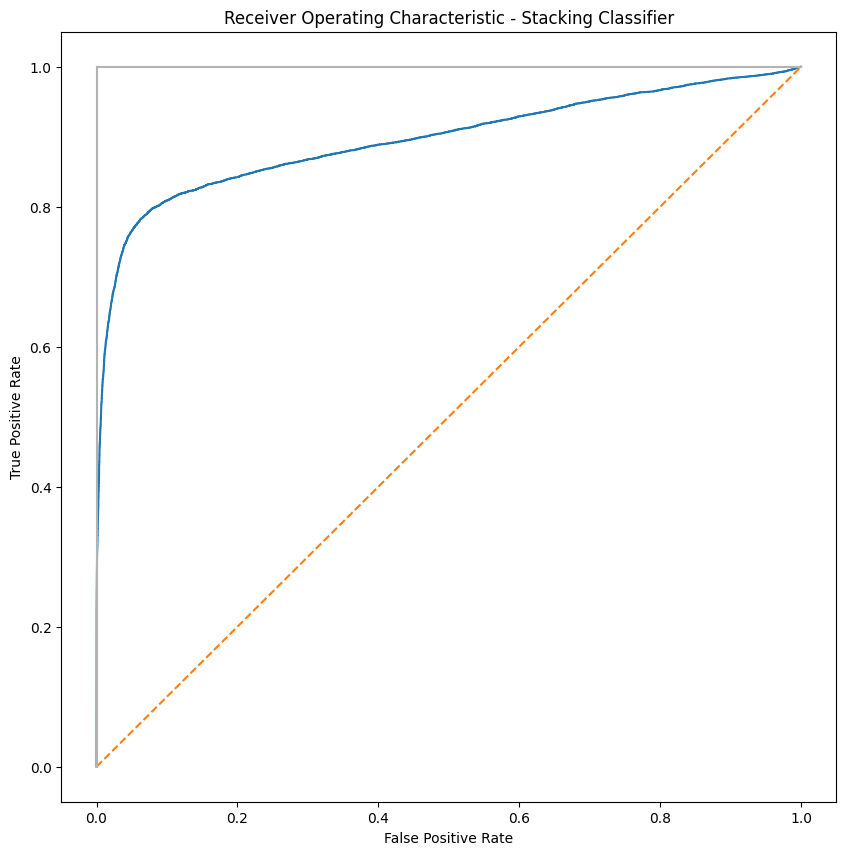

In [42]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Stacking Classifier')
plt.plot(fpr, tpr,label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Decision Tree

In [43]:
# Step 4: Create the decision tree
dt = DecisionTreeClassifier(max_depth=2)

# Step 5: Train the decision tree
dt.fit(X_train, y_train)

# Step 6: Evaluate the decision tree
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
cf_matrix=confusion_matrix(y_test,y_pred)
print(cf_matrix)
print(f"Accuracy: {accuracy}")
# Detailed classification report
print(classification_report(y_test, y_pred))

[[17858  2142]
 [ 2847  8332]]
Accuracy: 0.8399884537669585
              precision    recall  f1-score   support

           0       0.86      0.89      0.88     20000
           1       0.80      0.75      0.77     11179

    accuracy                           0.84     31179
   macro avg       0.83      0.82      0.82     31179
weighted avg       0.84      0.84      0.84     31179

